# Проект: Статистический анализ данных

# Название проекта: "Анализ модели поведения пользователей сервиса аренды самокатов GoFast".

В аналитический отдел компании сервиса аренды самокатов GoFast поступила задача. Необходимо проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти. Для анализа переданы данные о некоторых пользователях из нескольких городов, а также об их поездках (всего 3 таблицы). Небольшое пояснение к данным:

Сервисом можно пользоваться:
- без подписки (ежемесячный платеж отсутствует);
- с подпиской (абонентская плата 199р/месяц)

При этом:
стоимость одной минуты поездки — 
- без подписки 8 рублей
- с подпиской 6 рублей;

Стоимость старта (начала поездки) — 
- без подписки 50 рублей;
- с подпиской - бесплатно.

 Основные задачи:
- Провести исследовательский анализ данных и выявить:
    * частоту встречаемости городов, 
    * соотношение пользователей с подпиской и без подписки, 
    * возраст пользователей, 
    * расстояние, которое пользователь преодолел за одну поездку;
    * среднюю продолжительность поездок.
- Посчитать выручку;
- Проверить гипотезы:
    * тратят ли пользователи с подпиской больше времени на поездки? 
    * Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
    * будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

 Сопутствующие задачи:
- провести предобработку данных.

 Дополнительные задачи:
- посчитать необходимо количество промокодов для успешного завершения акции;
- посчитать вероятность того, что акция с push-уведомлениями принесет менее 40% просмотров в случае рассылки 1 млн. уведомлений.


# План работы:
    - определить необходимые библиотеки и подключить их;
    - загрузить и осмотреть данные;
    - сделать предобработку;
    - провести исследовательский анализ данных;
    - подтвердить или опровергнуть гипотезы;
    - по возможности сделать дополнительное задание;
    - написать выводы.

In [1]:
# Подключим библиотеки
import pandas as pd
import numpy as np
from math import*
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import binom, poisson, norm

#### Шаг 1. Загрузка данных

In [2]:
df_user = pd.read_csv('/datasets/users_go.csv')
df_ride = pd.read_csv('/datasets/rides_go.csv')
df_sub = pd.read_csv('/datasets/subscriptions_go.csv')

Выведем первые строки датафреймов:

In [3]:
print(df_user.head())
print()
print(df_ride.head())
print()
print(df_sub.head())

   user_id        name  age            city subscription_type
0        1        Кира   22          Тюмень             ultra
1        2   Станислав   31            Омск             ultra
2        3     Алексей   20          Москва             ultra
3        4  Константин   26  Ростов-на-Дону             ultra
4        5       Адель   28            Омск             ultra

   user_id     distance   duration        date
0        1  4409.919140  25.599769  2021-01-01
1        1  2617.592153  15.816871  2021-01-18
2        1   754.159807   6.232113  2021-04-20
3        1  2694.783254  18.511000  2021-08-11
4        1  4028.687306  26.265803  2021-08-28

  subscription_type  minute_price  start_ride_price  subscription_fee
0              free             8                50                 0
1             ultra             6                 0               199


Посмотрим общую информацию и тип данных:

In [4]:
df_user.info()
df_user.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


In [5]:
df_ride.info()
df_ride.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


In [6]:
df_sub.info()
df_sub.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


,minute_price,start_ride_price,subscription_fee
count,2.000000,2.000000,2.000000
mean,7.000000,25.000000,99.500000
std,1.414214,35.355339,140.714249
min,6.000000,0.000000,0.000000
25%,6.500000,12.500000,49.750000
50%,7.000000,25.000000,99.500000
75%,7.500000,37.500000,149.250000
max,8.000000,50.000000,199.000000


Данные загрузились и считались почти нормально, отрицательных значений нет. Исключение столбец - date в df_ride. Он считался как строковый тип данных, на этапе предобработки надо будет это исправить на datetime.

#### Шаг 2. Предобработка данных

##### Смена типа данных в столбце date df_user

In [7]:
# изменим тип данных в 'date' со строкового на datetime
df_ride['date'] = pd.to_datetime(df_ride['date'], format='%Y-%m-%d')
#проверим
print(df_ride['date'].dtypes)

datetime64[ns]


##### Создание столбца с номером месяца

In [8]:
# cоздадим новый столбец с номером месяца на основе столбца date
df_ride['month'] = df_ride.date.dt.month
#проверим
df_ride.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


##### Дубликаты и пропуски

###### df_user

Проверим наличие дубликатов и пропусков в df_user:

In [9]:
print('Количество явных дубликатов в df_user', df_user.duplicated().sum())
print('Количество пропусков в столбцах df_user', df_user.isnull().sum())

Количество явных дубликатов в df_user 31
Количество пропусков в столбцах df_user user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64


Пропусков нет, но явных дубликатов - 31, удалим их:

In [10]:
df_user = df_user.drop_duplicates()
print('Количество явных дубликатов в df_user:', df_user.duplicated().sum())

Количество явных дубликатов в df_user: 0


На всякий случай, посмотрим названия городов в столбце city:

In [11]:
print(df_user['city'].unique())

['Тюмень' 'Омск' 'Москва' 'Ростов-на-Дону' 'Краснодар' 'Пятигорск'
 'Екатеринбург' 'Сочи']


Похоже, города заполнены верно. Перейдем к следующему дф.

###### df_ride

In [12]:
print('Количество явных дубликатов в df_ride', df_ride.duplicated().sum())
print('Количество пропусков в столбцах df_ride:', df_ride.isnull().sum())

Количество явных дубликатов в df_ride 0
Количество пропусков в столбцах df_ride: user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64


Пропусков и дубликатов нет, отрицательные значения мы проверили ранее. Хорошо, идем дальше.

###### df_sub

In [13]:
print('Количество явных дубликатов в df_sub', df_sub.duplicated().sum())
print('Количество пропусков в столбцах df_sub:', df_sub.isnull().sum())

Количество явных дубликатов в df_sub 0
Количество пропусков в столбцах df_sub: subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


Пропусков и дубликатов нет, проверим столбцы дф на наличие странных и ошибочных значений:

In [14]:
for column in df_sub.columns:
    unique_values = df_sub[column].unique()
    print(f"Уникальные значения в столбце '{column}': {unique_values}")

Уникальные значения в столбце 'subscription_type': ['free' 'ultra']
Уникальные значения в столбце 'minute_price': [8 6]
Уникальные значения в столбце 'start_ride_price': [50  0]
Уникальные значения в столбце 'subscription_fee': [  0 199]


Похоже, все соответствует заданию, перейдём к исследовательскому анализу данных:

#### Шаг 3. Исследовательский анализ данных

##### Частота встречаемости городов:

построим таблицу:

In [15]:
city_frequency = df_user.groupby('city')['user_id'].count()
city_frequency = city_frequency.sort_values(ascending=False)
print(city_frequency)

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: user_id, dtype: int64


Построим столбчатую диаграмму, здесь она будет наиболее наглядно демонстрировать результат:

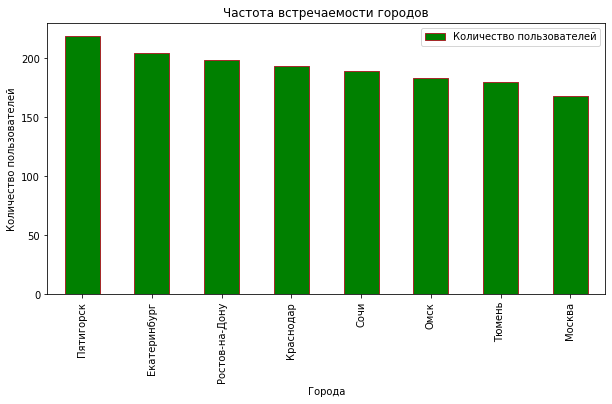

In [16]:
city_frequency.plot(x = 'city', kind = 'bar', figsize=(10, 5), color = 'green', edgecolor = 'brown', label = 'Количество пользователей')
plt.xlabel('Города')
plt.ylabel('Количество пользователей')
plt.title('Частота встречаемости городов')
plt.legend()
plt.show()

Вывод довольно неожиданный... Несмотря на явную разницу в количестве населения, Пятигорск находится на первом месте, Москва на последнем. Всего городов представлено 8.

##### Cоотношение пользователей с подпиской и без подписки

Построим сводную таблицу:

In [17]:
subs_frequency = df_user.groupby('subscription_type')['user_id'].count()
print(subs_frequency)

subscription_type
free     835
ultra    699
Name: user_id, dtype: int64


Построим круговую диаграмму, здесь она будет наглядной:

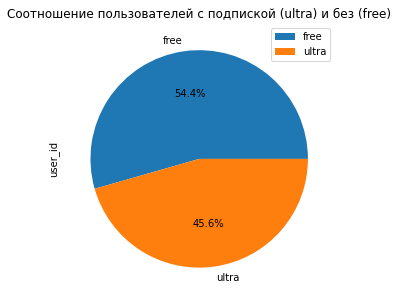

In [18]:
subs_frequency.plot(kind = 'pie', figsize=(5, 5), autopct='%1.1f%%')
plt.title('Соотношение пользователей с подпиской (ultra) и без (free)')
plt.legend()
plt.show()

Пользователей с подпиской немного меньше чем без неё.

##### Возраст пользователей

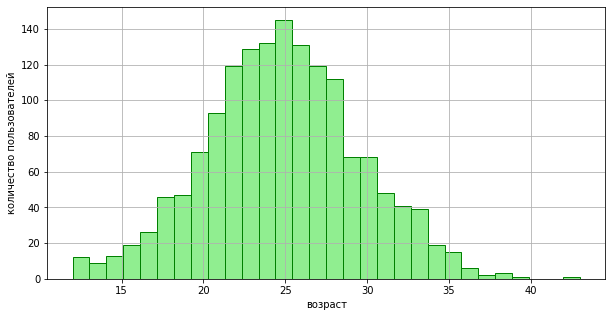

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [19]:
df_user['age'].hist(grid=True, figsize = (10,5), bins = 30, color = 'lightgreen', edgecolor='green', label = 'Возраст пользователей')
plt.xlabel('возраст')
plt.ylabel('количество пользователей')
plt.show()
df_user['age'].describe()

Данные по возрасту распределены нормально, выбросов не видно, что подтверждается гистограммой и близкими значениями медианы и среднего (~25 лет).

##### Расстояние, которое пользователь преодолел за одну поездку

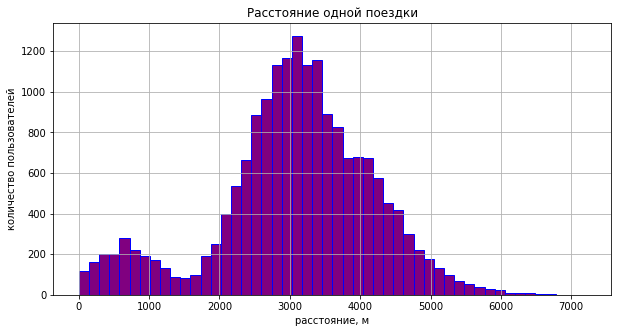

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

In [20]:
df_ride['distance'].hist(grid=True, color = 'purple', edgecolor = 'blue', figsize = (10,5), bins = 50)
plt.title('Расстояние одной поездки')
plt.xlabel('расстояние, м')
plt.ylabel('количество пользователей')
plt.show()
df_ride['distance'].describe()

Среднее расстояние большинства поездок составляет около 3-х км. Имеется всплеск около 600м, но из-за того что он небольшой, назвать распределением бимодальным нельзя. Поездки на 3 км - вероятно, это прогулки, а вот 500-600 м скорее похоже на способ добраться до метро.

##### Продолжительность поездок

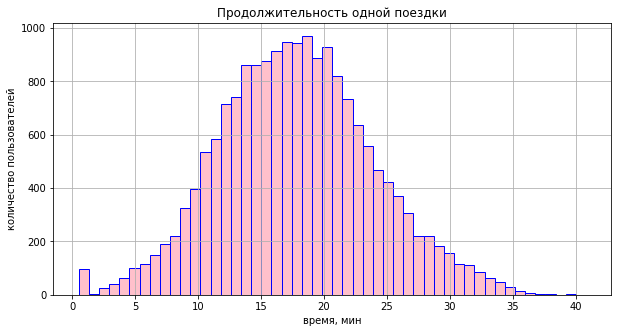

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [21]:
df_ride['duration'].hist(grid=True, figsize = (10,5), color = 'pink', edgecolor = 'blue', bins = 50)
plt.title('Продолжительность одной поездки')
plt.xlabel('время, мин')
plt.ylabel('количество пользователей')
plt.show()
df_ride['duration'].describe()

Данные распределены нормально, среднее время поездки составляет около 15-20 минут.

Странный выброс в районе менее 1 минуты. Посмотрим на эти строки:

In [22]:
print(df_ride[df_ride['duration']<1])

       user_id     distance  duration       date  month
6531       701  4196.445201       0.5 2021-08-31      8
6570       704  4830.824371       0.5 2021-10-14     10
6680       712  4684.004397       0.5 2021-03-04      3
6695       713  5215.642710       0.5 2021-02-25      2
6768       718  5197.436649       0.5 2021-02-11      2
...        ...          ...       ...        ...    ...
17004     1460  5531.335845       0.5 2021-01-19      1
17242     1477  6724.932981       0.5 2021-01-12      1
17314     1483  4445.481070       0.5 2021-03-06      3
17505     1496  5722.551787       0.5 2021-02-14      2
17909     1524  4103.998874       0.5 2021-06-18      6

[95 rows x 5 columns]


По всей видимости имеет место какая-то техническая ошибка. Дистанция 4-7 км за 30 секунд. Это почти 840 км/ч. Вряд ли самокат выдает такие характеристики. Таких данных почти 100 строк, надо сообщить об этом коллегам занимающимся регистрацией и снятием данных.

#### Шаг 4. Объединение данных

##### Объединим все в один дф

In [23]:
df_mrg = df_ride.copy() # на всякий случай сделаем копию
df_mrg = df_mrg.merge(df_user, how = 'left', on = 'user_id' )
df_mrg = df_mrg.merge(df_sub, how = 'left', on='subscription_type')
display(df_mrg) # посмотрим, что получилось. В отличие от print() выводит данные более читаемо

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11,Альберт,25,Краснодар,free,8,50,0
18064,1534,2840.423057,21.409799,2021-11-16,11,Альберт,25,Краснодар,free,8,50,0
18065,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25,Краснодар,free,8,50,0
18066,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25,Краснодар,free,8,50,0


Похоже, все более-менее склеилось.

##### Создание дф в зависимости от наличия подписки

###### Без подписки

In [24]:
df_mrg_free = df_mrg[df_mrg['subscription_type'] == 'free'] #склеиваем
display(df_mrg_free.head()) #посмотрим что получилось
print()
print(df_mrg_free.info()) #глянем на общую инфо полученного дф

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0



<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   distance           11568 non-null  float64       
 2   duration           11568 non-null  float64       
 3   date               11568 non-null  datetime64[ns]
 4   month              11568 non-null  int64         
 5   name               11568 non-null  object        
 6   age                11568 non-null  int64         
 7   city               11568 non-null  object        
 8   subscription_type  11568 non-null  object        
 9   minute_price       11568 non-null  int64         
 10  start_ride_price   11568 non-null  int64         
 11  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.1+ MB
None


Похоже, все получилось, перейдем ко 2 части.

###### С подпиской

In [25]:
df_mrg_ultra = df_mrg[df_mrg['subscription_type'] == 'ultra'] #склеиваем
display(df_mrg_ultra.head()) #посмотрим что получилось
print()
print(df_mrg_ultra.info()) #глянем на общую инфо полученного дф

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199



<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   distance           6500 non-null   float64       
 2   duration           6500 non-null   float64       
 3   date               6500 non-null   datetime64[ns]
 4   month              6500 non-null   int64         
 5   name               6500 non-null   object        
 6   age                6500 non-null   int64         
 7   city               6500 non-null   object        
 8   subscription_type  6500 non-null   object        
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 660.2+ KB
None


Вроде бы, все нормально. Идем дальше.

##### Визуализация

###### Расстояние поездки

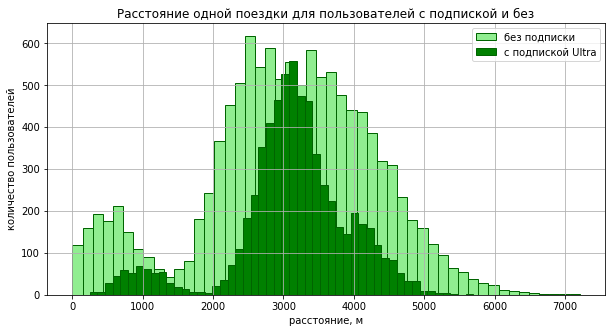

In [26]:
df_mrg_free['distance'].plot(kind = 'hist', grid=True, color='lightgreen', edgecolor='darkgreen', figsize = (10,5), bins = 50, label='без подписки')
df_mrg_ultra['distance'].plot(kind = 'hist', grid=True, color = 'green', edgecolor='darkgreen', figsize = (10,5), bins = 50, label='с подпиской Ultra')
plt.title('Расстояние одной поездки для пользователей с подпиской и без')
plt.xlabel('расстояние, м')
plt.ylabel('количество пользователей')
plt.legend(loc='upper right')
plt.show()

###### Продолжительность поездки

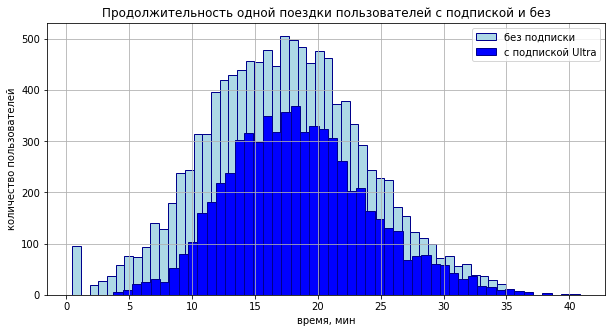

In [27]:
df_mrg_free['duration'].plot(kind = 'hist', grid=True, color = 'lightblue', edgecolor = 'darkblue', figsize = (10,5), bins = 50, label='без подписки')
df_mrg_ultra['duration'].plot(kind = 'hist', grid=True, color = 'blue', edgecolor = 'darkblue', figsize = (10,5), bins = 50, label='с подпиской Ultra')
plt.title('Продолжительность одной поездки пользователей с подпиской и без')
plt.xlabel('время, мин')
plt.ylabel('количество пользователей')
plt.legend(loc='upper right')
plt.show()

Данные успешно объеденены в единый датафрейм. Также были визуализированы соотношение расстояний и продолжительности поездок для пользователей с подпиской и без. Гистограммы подтверждают ранее опубликованную круговую диаграмму о том, что пользователей с подпиской немного меньше чем без. При это данные по поездкам (дальность, время) у обоих категорий распределены нормально.

#### Шаг 5. Подсчёт выручки

##### ДФ с аггрегированными данными

In [28]:
# воспользуемся подсказкой из задания и округлим время поезки до следующего целого числа
df_mrg['duration'] = np.ceil(df_mrg['duration'])
df_mrg['duration'] = df_mrg['duration'].astype('int')
#делаем сводную таблицу
df_agg = df_mrg.pivot_table(index= ['user_id', 'month'], values = ['distance', 'duration'], aggfunc = ['count', 'sum']) 
display(df_agg)

count                    sum         
              distance duration      distance duration
user_id month                                         
1       1            2        2   7027.511294       42
        4            1        1    754.159807        7
        8            2        2   6723.470560       46
        10           2        2   5809.911100       32
        11           3        3   7003.499363       56
...                ...      ...           ...      ...
1534    6            2        2   3409.468534       26
        8            2        2   7622.453034       48
        9            1        1   4928.173852       23
        11           4        4  13350.015305       78
        12           1        1   2371.711192       16

[11331 rows x 4 columns]

In [29]:
df_agg = df_agg.reset_index() #сбросим индекс и переименуем столбцы
df_agg.columns = ['user_id', 'month', 'month_rides', 'count_duration', 'total_distance', 'total_duration']
display(df_agg)

,user_id,month,month_rides,count_duration,total_distance,total_duration
0,1,1,2,2,7027.511294,42
1,1,4,1,1,754.159807,7
2,1,8,2,2,6723.470560,46
3,1,10,2,2,5809.911100,32
4,1,11,3,3,7003.499363,56
...,...,...,...,...,...,...
11326,1534,6,2,2,3409.468534,26
11327,1534,8,2,2,7622.453034,48
11328,1534,9,1,1,4928.173852,23
11329,1534,11,4,4,13350.015305,78


In [30]:
#столбец count_duration - лишний, можно от него избавится.
df_agg = df_agg.drop(columns=['count_duration'])
display(df_agg)

,user_id,month,month_rides,total_distance,total_duration
0,1,1,2,7027.511294,42
1,1,4,1,754.159807,7
2,1,8,2,6723.470560,46
3,1,10,2,5809.911100,32
4,1,11,3,7003.499363,56
...,...,...,...,...,...
11326,1534,6,2,3409.468534,26
11327,1534,8,2,7622.453034,48
11328,1534,9,1,4928.173852,23
11329,1534,11,4,13350.015305,78


##### Добавление столбца с помесячной выручкой

In [31]:
df_agg = df_agg.merge(df_user, how='left', on='user_id')
df_agg = df_agg.merge(df_sub, how = 'left', on='subscription_type')
display(df_agg)

,user_id,month,month_rides,total_distance,total_duration,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,1,2,7027.511294,42,Кира,22,Тюмень,ultra,6,0,199
1,1,4,1,754.159807,7,Кира,22,Тюмень,ultra,6,0,199
2,1,8,2,6723.470560,46,Кира,22,Тюмень,ultra,6,0,199
3,1,10,2,5809.911100,32,Кира,22,Тюмень,ultra,6,0,199
4,1,11,3,7003.499363,56,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,2,3409.468534,26,Альберт,25,Краснодар,free,8,50,0
11327,1534,8,2,7622.453034,48,Альберт,25,Краснодар,free,8,50,0
11328,1534,9,1,4928.173852,23,Альберт,25,Краснодар,free,8,50,0
11329,1534,11,4,13350.015305,78,Альберт,25,Краснодар,free,8,50,0


In [32]:
# Добавляем столбец с помесячной выручкой, которую принёс каждый пользователь
def income(row): #создадим функцию, которая будет суммировать все параметры из которых складывается выручка
  total_income = 0
  total_income = (row['start_ride_price'] * row['month_rides'] +
              row['minute_price'] * row['total_duration'] +
              row['subscription_fee']
              )
  return total_income

df_agg['month_income'] = df_agg.apply(income, axis=1)
display(df_agg)

,user_id,month,month_rides,total_distance,total_duration,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,month_income
0,1,1,2,7027.511294,42,Кира,22,Тюмень,ultra,6,0,199,451
1,1,4,1,754.159807,7,Кира,22,Тюмень,ultra,6,0,199,241
2,1,8,2,6723.470560,46,Кира,22,Тюмень,ultra,6,0,199,475
3,1,10,2,5809.911100,32,Кира,22,Тюмень,ultra,6,0,199,391
4,1,11,3,7003.499363,56,Кира,22,Тюмень,ultra,6,0,199,535
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,2,3409.468534,26,Альберт,25,Краснодар,free,8,50,0,308
11327,1534,8,2,7622.453034,48,Альберт,25,Краснодар,free,8,50,0,484
11328,1534,9,1,4928.173852,23,Альберт,25,Краснодар,free,8,50,0,234
11329,1534,11,4,13350.015305,78,Альберт,25,Краснодар,free,8,50,0,824


Данные агреггированы и необходимые значения посчитаны.

#### Шаг 6. Проверка гипотез

##### Гипотеза соотношений времени поездок

Проведем независимый двухвыборочный анализ:
    - Нулевая гипотеза состоит в том, что средние длительности поездок равны:
    - Альтернативной гипотеза состоит в том, что средняя длительность поездки в df_mrg_ultra больше, чем средняя длительность df_mrg_free.

In [33]:
alpha = 0.05 #выставляем уровень статистической значимости

# левосторонняя альтернативная гипотеза будем использовать параметр 'greater'
results = st.ttest_ind(df_mrg_ultra['duration'], df_mrg_free['duration'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


Разница pvalue и уровня статистической значимости приличная. Нулевую гипотезу можно отвергнуть.

##### Гипотеза, что расстояние одной поездки менее 3130 метров

Проверим гипотезы:

Нулевая гипотеза: среднее расстояние поездки пользователи с подпиской равна 3130 метрам
Альтернативная гипотеза: среднее расстояние поездки пользователи с подпиской меньше 3130 метров

In [34]:
interested_value = 3130 # время поездки

alpha = 0.05 # уровень статистической значимости

results = st.ttest_1samp(df_mrg_ultra['distance'], interested_value, alternative='less')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 0.08046311521502146
Не отвергаем нулевую гипотезу


Уровень статистической значимости меньше, чем pvalue, хоть и немного.

In [35]:
print(round(df_mrg_ultra['distance'].mean(),0)) #посмотрим среднюю дистанцию у пользователей с подпиской.

3115.0


Дистанция меньше заданных 3130, но учитывая масштабы, разница совсем небольшая. Отвергнуть нулевую гипотезу нельзя.

##### Гипотеза о помесячной выручке от пользователей с подпиской и без подписки

In [36]:
# создадим две выборки с посчитанной помесячной выручкой
df_agg_ultra = df_agg[df_agg['subscription_type'] == 'ultra']
df_agg_free = df_agg[df_agg['subscription_type'] == 'free']

alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(df_agg_ultra['month_income'], df_agg_free['month_income'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


Pvalue сильно меньше уровня статистической значимости, нулевую гипотезу можно отвергнуть.

##### Вопрос

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Ответ:
Думаю, что в этом случае правильнее применить t-тест проверки гипотез о равенстве средних для зависимых данных. В метод scipy.stats.ttest_rel() необходимо передать два параметра: наборы данных до обновлений и после.

#### Шаг 7. Распределения

##### Промокоды

Скопируем условия для удобства:

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соотвествующий платёж. Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10% пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5%. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

Так, поскольку вероятность продления составляет 10% (0.1), и 10% - это 100 клиентов, получается, что надо рассматривать выборку из 1000 пользователей.

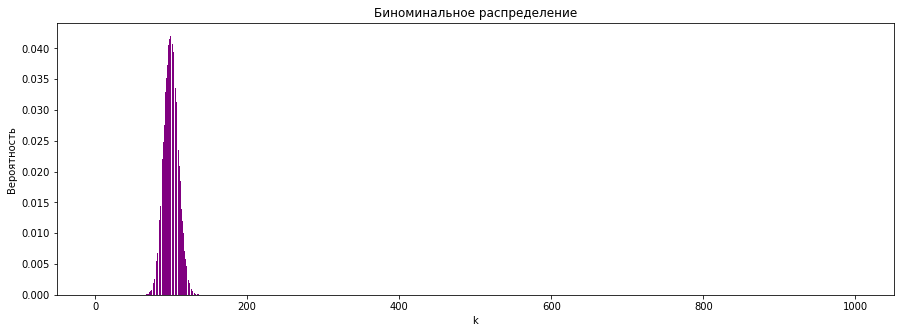

In [37]:
# определим примерный диапазон значений биномиального распределения графиком
n = 1000
p = 0.1
distr = []

for k in range(0, n + 1): #создадим цикл
    matches = factorial(n) / (factorial(k) * factorial(n - k))
    prob = matches * p**k * (1 - p)**(n - k) # затем вычисляем вероятность для данного значения k с использованием биномиального коэффициента и вероятностей успеха и неудачи
    distr.append(prob) #добавляем значения в список

plt.figure(figsize=(15, 5))
plt.xlabel('k')
plt.ylabel('Вероятность')
plt.title('Биноминальное распределение')
plt.bar(range(0, n + 1), distr, color = 'purple') #визуализирем
plt.show()

В диапазоне (n-500, n+500) вычислим минимальное количество промокодов чтобы вероятность не выполнить план была менее 5%.

In [38]:
for n in range (500,1500):
    if binom.cdf(99, n, p) < 0.05:
        print("Минимальное число промокодов:", n)
        break

Минимальное число промокодов: 1161


Для того чтобы в результате акции с вероятностью не менее 95% продлили не менее 100 подписок необходимо разослать не менее 1161 промокодов.

##### Push-уведомления

Пока не сделал, поскольку задание необязательное, решил отправить на проверку то что есть. Возможно, за время проверки и исправлений постораюсь что-то напрограммировать...

#### Выводы:

В результате проведенного исследования, удалось выявить следующее:
    
- в исследовании представлено 8 городов, больше всего пользователей в Пятигорске, меньше всего в Москве;
- средний возраст пользователя составляет 25 лет;
- среднее время аренды 15-20 минут;
- среднея дальность поездки состаляет 3 км;
- пользователей без подписки немного больше чем подключивших её (55% против 45%);
- средняя месячная выручка от пользователей с подпиской больше чем от пользователей без подписки.


Статистический анализ данных позволил выявить следующее:

- можно утверждать с вероятностью 95%, что время поездок пользователей с подпиской больше времени поездок пользователей без подписки;
- можно утверждать с вероятностью более 90%, что средняя дистанция поездки пользователя с подпиской меньше 3130 метров;
- можно утверждать с вероятностью 95%, что месячная выручка от пользователей с подпиской выше чем выручка от пользователей без неё.

Для отдела маркетинга по заданию, на данный момент было вычислено минимальное количество промокодов - 1161. Этого количества с вероятностью 95% будет достаточно, чтобы дать продление подписки в размере 100 пользователей.

Также следует обратить внимание на то, что в данных, очевидно, присутствует техническая ошибка. Некоторые данные содержат строки, где длительность аренды состаляет 0.5 минуты, а пройденное расстояние 4-7 км, что в пересчете на км/ч близко к скорости звука. Отделу отвечающему за регистрацию и выгрузку данных следует разобраться с этой проблемой.
